In [34]:
import numpy as np
import pandas as pd
from scipy.stats import norm,t, ttest_1samp,ttest_ind,ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

# Paired T Test

In [41]:
df=pd.read_csv("problem_solving.csv")
df

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43
...,...,...,...
132,132,45,44
133,133,46,42
134,134,40,35
135,135,60,66


In [4]:
df["test_1"].mean()

60.48905109489051

In [5]:
df["test_2"].mean()

62.43065693430657

In [ ]:
# Ho : mu1 = mu2 ( Problem Solving Class had no effect)
# Ha : mu1 < mu2 ( Problem Solving Class had effect)

In [10]:
# Ho : mu1 = mu2 ( Problem Solving Class had no effect)
# Ha : mu1 < mu2 ( Problem Solving Class had effect)
t_stat,p_value=ttest_rel(df["test_1"],df["test_2"],alternative= "less")
print("T_stat : ",t_stat)
print("p_value : ",p_value)
alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

T_stat :  -5.502886353508166
p_value :  8.979201768961566e-08
Interpretation : Reject Ho


In [11]:
# Ho : mu1 = mu2 ( Problem Solving Class had no effect)
# Ha : mu2 > mu1 ( Problem Solving Class had effect)
t_stat,p_value=ttest_rel(df["test_2"],df["test_1"],alternative= "greater")
print("T_stat : ",t_stat)
print("p_value : ",p_value)
alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

T_stat :  5.502886353508166
p_value :  8.979201768961566e-08
Interpretation : Reject Ho


## Paired T test and TTest 1 Sample

In [42]:
df["difference"]= df["test_2"]-df["test_1"]
df

,id,test_1,test_2,difference
0,0,40,38,-2
1,1,49,44,-5
2,2,65,69,4
3,3,59,63,4
4,4,44,43,-1
...,...,...,...,...
132,132,45,44,-1
133,133,46,42,-4
134,134,40,35,-5
135,135,60,66,6


In [43]:
df["difference"].mean()

1.9416058394160585

In [44]:
# Ho : (mu2-mu1)=0 ( Problem Solving Class had no effect)
# Ha : (mu2-mu1)>0 ( Problem Solving Class had effect)
t_stat,p_value=ttest_1samp(df["difference"],0,alternative= "greater")
print("T_stat : ",t_stat)
print("p_value : ",p_value)
alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

T_stat :  5.502886353508166
p_value :  8.979201768961566e-08
Interpretation : Reject Ho


# TTest Independant

In [14]:
df=pd.read_csv("Sachin_ODI.csv")
df

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14,0,34,15,2,0,93.33,2,Australia,Sydney,2012-02-26,Australia,False,False
356,39,0,45,30,5,0,130.00,2,Sri Lanka,Hobart,2012-02-28,India,True,False
357,6,0,25,19,1,0,31.57,1,Sri Lanka,Dhaka,2012-03-13,India,True,False
358,114,0,205,147,12,1,77.55,1,Bangladesh,Dhaka,2012-03-16,Bangladesh,False,True


## Batting pattern in 1st and 2nd Innings

In [15]:
df.groupby(["Inns"])["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [16]:
df_first_innings = df.loc[df["Inns"]==1]["runs"]
df_second_innings = df.loc[df["Inns"]== 2]["runs"]

In [17]:
df_first_innings.mean(),df_second_innings.mean()

(46.67058823529412, 40.17368421052632)

In [57]:
df_second_innings.sample

<bound method NDFrame.sample of 1       37
2       47
3       48
4        4
5      112
      ... 
353      3
354     22
355     14
356     39
359     52
Name: runs, Length: 190, dtype: int64>

In [23]:
# Ho : mu1 = mu2 ( first innings performance of sachin was similar to Second Innings performance
# Ha : mu1 > mu2 ( first innings performance of sachin was better in comparison to Second Innings performance)
t_stat,p_value=ttest_ind(df_first_innings,df_second_innings,alternative= "greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

t_stat :  1.4612016295532178
p_value :  0.07241862097379981
Interpretation : Fail to Reject Ho


## Batting pattern of Sachin When India Lost Or Won

In [ ]:
# victory vs defeat

In [25]:
df.groupby(["Won"])["runs"].mean()

Won
False    35.130682
True     51.000000
Name: runs, dtype: float64

In [26]:
df_won = df.loc[df["Won"]==True]["runs"]
df_lost = df.loc[df["Won"]== False]["runs"]

In [27]:
df_won.mean(),df_lost.mean()

(51.0, 35.13068181818182)

In [28]:
# Ho : mu_won = mu_lost ( Sachin's performance is similar in both situations , India won or lost
# Ha : mu_won > mu_lost ( Sachin's performance is better in the innings where India won in comparison to India Lost )
t_stat,p_value=ttest_ind(df_won,df_lost,alternative= "greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

t_stat :  3.628068563969343
p_value :  0.00016353077486826558
Interpretation : Reject Ho


# Aerofit

In [32]:
df= pd.read_csv("aerofit.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


<AxesSubplot:xlabel='Gender', ylabel='Income'>

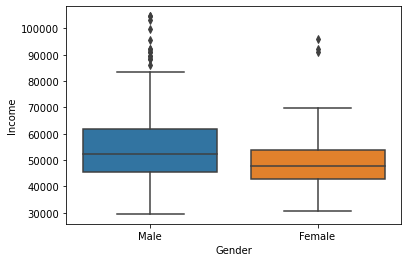

In [35]:
sns.boxplot(x="Gender",y="Income",data=df)

In [36]:
df.groupby(["Gender"])["Income"].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

In [37]:
df_male_income= df.loc[df["Gender"]=="Male"]["Income"]
df_female_income= df.loc[df["Gender"]=="Female"]["Income"]

In [38]:
# Ho : mu_male = mu_female ( Males and Females have similar incomes on an an avg.)
# Ha : mu_male > mu_female ( Males have higher Income in comparison to Females)
t_stat,p_value=ttest_ind(df_male_income,df_female_income,alternative= "greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha=0.05
if p_value<alpha:
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

t_stat :  2.752488637540257
p_value :  0.003263631548607129
Interpretation : Reject Ho


# Doubts

In [50]:
test_1=np.random.randint(10,40,size=137)
test_2=np.random.randint(20,80,size=137)

In [51]:
test_1.mean()

24.67153284671533

In [52]:
test_1.mean()

48.00729927007299

In [53]:
ttest_rel(test_1,test_2,alternative="less")

Ttest_relResult(statistic=-12.954139217035824, pvalue=8.384017346243758e-26)

In [54]:
ttest_1samp(test_2-test_1,0,alternative="greater")

Ttest_1sampResult(statistic=12.954139217035824, pvalue=8.384017346243758e-26)

In [ ]:
Get me understand, that it become 2 sided!
couldnt figure it out! The one sample T-test
is used when we want to compare a sample mean
to a population mean. The average British man is 175.3 cm tall. 
A survey recorded the heights of 10 UK men and
we want to know whether the mean of the sample 
is different from the population mean. 
survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

In [ ]:
so can we directly compare t_stat with t_critical like we did in z_test ?
for .95 confidence we can calculate z_critical which is =1.64 and directly compare that with z_stat, how to calculate similarly for t the
t_critical value, so that we don't need to compare p_value to alpha, and can directly compare the z_stat that we get?